# Heat engines & and the second law

At the end of the last lecture, we stated the second law of thermodynamics in 2 different ways:

1. No process is possible whose sole result is the transfer of heat from a colder to a hotter body. (Clasius)
2. No process is possible whose sole result is the complete conversion of heat into work. (Kelvin)

So, assuming that these statements are true, let's consider the second statement. This says that no process can completely convert heat into work, meaning there must be a limit to the efficiency of converting heat into work. As such, we want to figure what this efficiency is. First, we are going to define efficiency as:
$$
    \eta = \frac{W}{Q_{\rm H}}
$$
That is, we will supply a system with heat $Q_{\rm H}$, and the system will then do some work $W$. To figure out what this efficiency is and how the various terms in that equation work, we will consider the Carnot engine.

## The Carnot Engine

Consider the following engine.

![Carnot_Engine](Figures/Carnot_Engine.png)

It is able to draw heat $Q_{\rm H}$ from a reservoir which is at a temperature $T_H$. It then dumps heat $Q_{\rm L}$ to reservoir which is at a temperature $T_L$ while doing some work.

We are going to let the engine perform the following steps: an isothermal expansion, followed by an adiabatic expansion, followed by an isothermal compression, and then another adiabatic compression. These 4 processes will trace out a path shown below in the P-V diagram, where the process follows a series of isotherms and adiabats. 

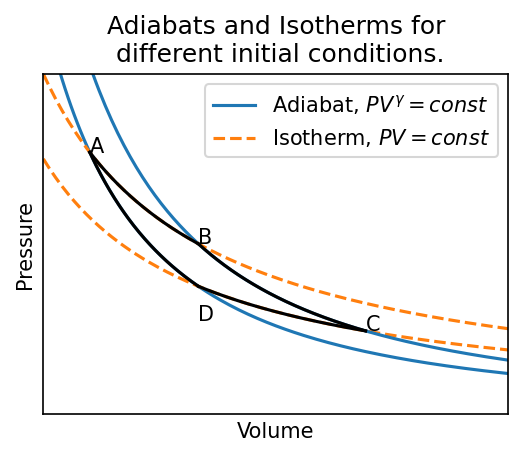

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c

def adiabatic(V_i,P_i,V):
    gamma = 5/3
    return (P_i*V_i**gamma)/(V**gamma)

def isothermal(V_i,P_i,V):
    T = P_i*V_i/c.R
    return (c.R*T/V)

P_is = np.arange(3,5,1)*u.Pa
V_i = 1*u.m**3
V = np.arange(0.5,2.02,0.01)*u.m**3

plt.figure(figsize=[4,3],dpi=150)
#Plotting the full isotherms & Adiabats
for P_i in P_is:
    P_a = adiabatic(V_i,P_i,V)
    P_isot = isothermal(V_i,P_i,V)
    if P_i == 3.0*u.Pa:
        plt.plot(V,P_a,'C0-',label='Adiabat, $PV^\gamma=const$')
        plt.plot(V,P_isot,'C1--',label='Isotherm, $PV=const$')
    else:
        plt.plot(V,P_a,'C0-',label='')
        plt.plot(V,P_isot,'C1--',label='')

gamma = 5/3
V_A = (P_is[0]/P_is[1])**(1/(gamma-1))
P_A = P_is[1]*V_i/V_A
plt.text(V_A.value,P_A.value,'A')

V_B = V_i
P_B = P_is[1]
plt.text(V_B.value,P_B.value,'B')

V_C = (P_is[1]/P_is[0])**(1/(gamma-1))
P_C = P_is[0]*V_i/V_C
plt.text(V_C.value,P_C.value,'C')

V_D = V_i
P_D = P_is[0]
plt.text(V_D.value,P_D.value-0.8,'D')

# Process A-B
V_temp = np.arange(V_A.value,V_B.value,0.001)*u.m**3
P_temp = isothermal(V_A,P_A,V_temp)
plt.plot(V_temp,P_temp,'k-',label='')

# Process B-C
V_temp = np.arange(V_B.value,V_C.value,0.001)*u.m**3
P_temp = adiabatic(V_B,P_B,V_temp)
plt.plot(V_temp,P_temp,'k-',label='')

# Process C-D
V_temp = np.arange(V_C.value,V_D.value,-0.001)*u.m**3
P_temp = isothermal(V_C,P_C,V_temp)
plt.plot(V_temp,P_temp,'k-',label='')

# Process D-A
V_temp = np.arange(V_D.value,V_A.value,-0.001)*u.m**3
P_temp = adiabatic(V_D,P_D,V_temp)
plt.plot(V_temp,P_temp,'k-',label='')

frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
plt.xlim(0.5,2)
plt.ylim(0.0,8)
plt.ylabel("Pressure")
plt.xlabel("Volume")
plt.title("Adiabats and Isotherms for\n different initial conditions.")
plt.legend()
plt.savefig("Figures/Carnot_Cycle.jpg")
plt.show()

Because the processes B-C and D-A are adiabatic, and A-B and C-D are isothermal, we can make the following statement. Heat $Q_{\rm H}$ enters the engine during process A-B, and heat $Q_{\rm L}$ leaves during C-D, and no heat is lost duing B-C and D-A. Finally, the process is cyclic, meaning there is no change in the internal energy of our engine. As such, the work done by the engine is given by
$$
    W = Q_{\rm H}-Q_{\rm L}
$$
In order to understand this expression, we need to figure out what $Q_{\rm H}$ and $Q_{\rm H}$ might be. As such, let's consider an ideal gas and follow it during each of the 4 stages.

1. A-B, Isothermal expansion. $Q_{\rm H} = R T_{\rm H} \ln \frac{V_B}{V_A}$.
2. B-C, Adiabatic expansion. $\frac{T_{\rm H}}{T_{\rm L}} = \left(\frac{V_{\rm C}}{V_{\rm B}}\right)^{\gamma - 1}$.
3. C-D, Isothermal compression. $Q_{\rm L} = R T_{\rm L} \ln \frac{V_C}{V_D}$.
4. B-C, Adiabatic compression. $\frac{T_{\rm L}}{T_{\rm H}} = \left(\frac{V_{\rm A}}{V_{\rm D}}\right)^{\gamma - 1}$.

Combining all of these together thus gives:
$$
    \frac{Q_H}{Q_L} = \frac{T_H}{T_L}
$$
It's also important to note that all of these processes are being done reversible, so we are free to change the directions of the arrows in our schematic (we'll come across this later in this lecture).

For the Carnot engine with an ideal gas, we can thus express the efficiency in terms of the temperatures of the isoterms by:
\begin{align}
    \eta &= \frac{Q_{\rm H}-Q_{\rm L}}{Q_{\rm H}}=1-\frac{Q_{\rm L}}{Q_{\rm H}}\\
    \eta &= 1-\frac{T_{\rm L}}{T_{\rm H}}
\end{align}

It turns out that this expression for efficiency is the highest efficiency any engine can achieve for a given $T_{\rm H}$ and $T_{\rm L}$, assuming Clausius's statement of the second law.

## The equivalence of Clausius's and Kelvin's statement of the 2nd law

We now want to ask 2 questions.
1. If a system violates Kelvin's statement, it also violates Clausius' statement.
2. If a system violates Clausius' statement, it also violates Kelvin's statement.

To answer these questions, we're going to take the Carnot engine and hook up some special equipment, and see what happens.

### 1. If a system violates Kelvin's statement, it also violates Clausius' statement.
Let's assume we have the following system. This system violates Kelvin's statement, as the Kelvin violator is converting heat solely into work.

![Kelvin Violator](Figures/Kelvin_Violator.png)

In this case, we would have $Q_{\rm  H}' = W$ from the Kelvin violator, and $Q_{\rm H} = Q_{\rm L} + W$ from the Carnot engine. The heat dumped into the reservor at $T_{rm H}$ is then $Q_{H}-Q_{H}'=Q_{L}$. Thus, the net process of the entire system is a flow of energy of $Q_{\rm L}$ from the cold reservoir to the hot reservoir, which violates Clausius' statement.

### 2. If a system violates Clausius' statement, it also violates Kelvin's statement.
Let's assume we have the following system. This system violates Clausius' statement, as the Clausius violator is transferring heat from a colder body to a hotter body.

![Clausius Violator](Figures/Clausius_Violator.png)

The first law implies that for the Carnot engine, $Q_{\rm H}-Q_{\rm L} = W$. The sole effect of the whole system is thus to convert the heat $Q_{\rm H}-Q_{\rm L}$ into work. This violates Kelvin's law!

## Refrigerators

Let's now consider a engine running in the reverse direction to that discussed above.

![Clausius Violator](Figures/Reverse_Carnot_Engine.png)

In this case, work is put into the engine, and heat flows from the cold temperature reservoir to hot reservoir. The relevant efficiency in this case is
$$
    \eta = \frac{Q_{\rm L}}{W}
$$
as we want to know what flow of heat we can achieve for a given amount of work. Using the above arguements that we used for the Carnot engine, it's then easy to show that
$$
    \eta = \frac{T_{\rm L}}{T_{\rm H}-T_{\rm L}}
$$
which is  greater than 100%. So, when we design an engine to do work, the efficiency will be less than 1. However, when we design an engine to exchange heat between bodies, the efficiency will be greater than 1.

## Clausius' Theorem

Consider one cycle of a Carnot engine. Over this cycle, $Q_{\rm H}$ enters the engine and $Q_{\rm L}$ leaves the engine. We know from earlier discussions that
$$
    \frac{Q_{\rm H}}{Q_{\rm L}} = \frac{T_{\rm H}}{T_{\rm L}}
$$
We will now define $\Delta Q_{\rm rev}$ as the heat entering the system at each point of the process, such that
$$
    \sum \frac{\Delta Q_{\rm rev}}{T} = \frac{Q_{\rm H}}{T_{\rm H}} + \left(-\frac{Q_{\rm L}}{T_{\rm L}}\right) = 0
$$
Rather than just summing up all the contributions, we could instead integrate, in which case we get
$$
    \oint \frac{{\rm d} Q_{\rm rev}}{T} = 0
$$
While this is a useful result, we must now remember that the Carnot engine does everything reversible. So now we want to consider what this inequality looks like for real world systems.

Consider now the following setup. We have two engines which are connected to two reservoirs, one at temperature $T_{\rm H}$ and one at $T_{\rm L}$. One engine is a Carnot engine, and so everything is performed reversibly, while the other one is not.

![Clausius_Inequality](Figures/Clausius_Inequality.png)

Now let's consider the efficincies of both engines. For the Carnot engine, I'll use subscript R for reversible, and for the other engine I'll use I for irreversible.
\begin{align}
    \eta_R &= 1-\frac{Q_{L,R}}{Q_{H,R}}\\
    \eta_I &= 1-\frac{Q_{L,I}}{Q_{H,I}}
\end{align}
So we stated earlier that a Carnot engine is the most efficient type of engine we can have. As such
$$
    \eta_{R} \geq \eta_{I}
$$
These leads to
\begin{align}
    1-\frac{Q_{L,R}}{Q_{H,R}} &\geq 1-\frac{Q_{L,I}}{Q_{H,I}}\\
    \frac{Q_{L,R}}{Q_{H,R}} &\leq \frac{Q_{L,I}}{Q_{H,I}}\\
\end{align}
Now recalling that for a Carnot engine we have
$$
    \frac{Q_H}{Q_L} = \frac{T_H}{T_L}
$$
we then get
\begin{align}
    \frac{T_{L}}{T_{H}} &\leq \frac{Q_{L,I}}{Q_{H,I}}\\
    \frac{Q_{H,I}}{T_{H}} - \frac{Q_{L,I}}{T_{L}} &\leq 0\\
\end{align}
which is the same as 
$$
    \oint \frac{{\rm d} Q}{T} \leq 0
$$
There are many other ways of arriving at this inequality, which I recommend you look up. The identity will become important in the next lecture.